In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
# setting pandas  to show us every row and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Reading the data

In [3]:
# Reading the data
df = pd.read_csv('data-raw/data.csv')

In [4]:
# My first look at our data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# I drop the ID feature, since it doesn't contain any usefull information
df.drop(columns='Id', inplace=True)

In [6]:
def print_dataset_info(df):
    """
    Prints basic information about the dataset, including the number of observations
    and the number of features (categorical and numerical).

    Parameters:
        df (pandas.DataFrame): The DataFrame to be analyzed.
    """
    num_obs, num_feat = df.shape[0], df.shape[1]
    num_cat_feat = df.select_dtypes(include=['object', 'string']).shape[1]
    num_num_feat = df.select_dtypes(include=['integer', 'float']).shape[1]

    print(f'The number of observations: {num_obs}')
    print(f'The total number of features: {num_feat}')
    print(f'The number of categorical features: {num_cat_feat}')
    print(f'The number of numerical features: {num_num_feat}')

print_dataset_info(df)

The number of observations: 1460
The total number of features: 80
The number of categorical features: 43
The number of numerical features: 37


In [7]:
def check_missing_values(df):
    """
    Explore and report missing values in the DataFrame.

    Parameters:
        df (pandas.DataFrame): The DataFrame to be analyzed.

    Returns:
        pandas.DataFrame: A DataFrame containing missing value counts and percentages.
    """
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]

    total_rows = df.shape[0]
    missing_percentage = (missing_counts / total_rows) * 100
    missing_percentage = missing_percentage.round(2)  # Round to 2 decimal places

    result_df = pd.DataFrame({
        'Missing Count': missing_counts,
        'Percentage': missing_percentage
    })

    result_df.sort_values(by='Percentage', ascending=False, inplace=True)

    return result_df

check_missing_values(df)


,Missing Count,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


Handling Missing Data:

I observed that the dataset contains a considerable amount of missing data. According to the data description, the following features have missing values when a particular property is not present. To address this, we will replace these missing values with "None":

- PoolQC
- MiscFeature
- Alley
- Fence
- MasVnrType
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- BsmtFinType2
- BsmtExposure
- BsmtFinType1
- BsmtCond
- BsmtQual

For specific features mentioned below, I will use the following imputation strategies:

- GarageYrBlt: If there is no garage, the GarageYrBlt value is missing. I will fill these missing values with zero.
- MasVnrArea: If the house does not have masonry veneer, the MasVnrArea value is likely missing. I will fill these missing values with zero.
- LotFrontage: Approximately 18% of the values for this feature are missing. To impute these missing values, I will use the median LotFrontage value for the given neighborhood.
- Electrical: There is only one missing value for this feature. I will impute it using the mode (most common value) of this feature.


In [8]:
features_to_fill_with_none = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'
]
features_to_fill_with_zero = ['GarageYrBlt', 'MasVnrArea'], 

for feature in features_to_fill_with_none:
    df[feature] = df[feature].fillna("None")

for feature in features_to_fill_with_zero:
    df[feature] = df[feature].fillna("0")

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0]) 
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [9]:
check_missing_values(df)

,Missing Count,Percentage


I have succesfully eliminated all the missing values. 

Based on the data descritpion I can do some further modifications 

In [10]:
# Since MSSubClass appears to encompass HouseStyle, BldgType, and YearBuilt, we can drop it to avoid any unnecessary complexity.
df.drop(columns=['MSSubClass'],inplace=True)

#These should be a categorical feature
df['MasVnrArea'] = df['MasVnrArea'].astype(np.int64)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(np.int64)

# There are some categorical features that can be transformed into ordinal scale
map_for_ordinals = {'Ex':5,
                    'Gd':4,
                    'TA':3,
                    'Fa':2,
                    'Po':1,
                    'NA':0,
                    'None':0}

features_to_convert_ordinals = [
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'HeatingQC',
    'KitchenQual',
    'FireplaceQu',
    'GarageQual',
    'GarageCond',
    'PoolQC'
]

for feature in features_to_convert_ordinals:
    df[feature].replace(map_for_ordinals, inplace=True)


In [11]:
print_dataset_info(df)

The number of observations: 1460
The total number of features: 79
The number of categorical features: 33
The number of numerical features: 46


Since I have a lot of features to explore, I'm going to drop the ones that has zero or almost zero information gain. To achive this I will run the mutual information score algorithm 

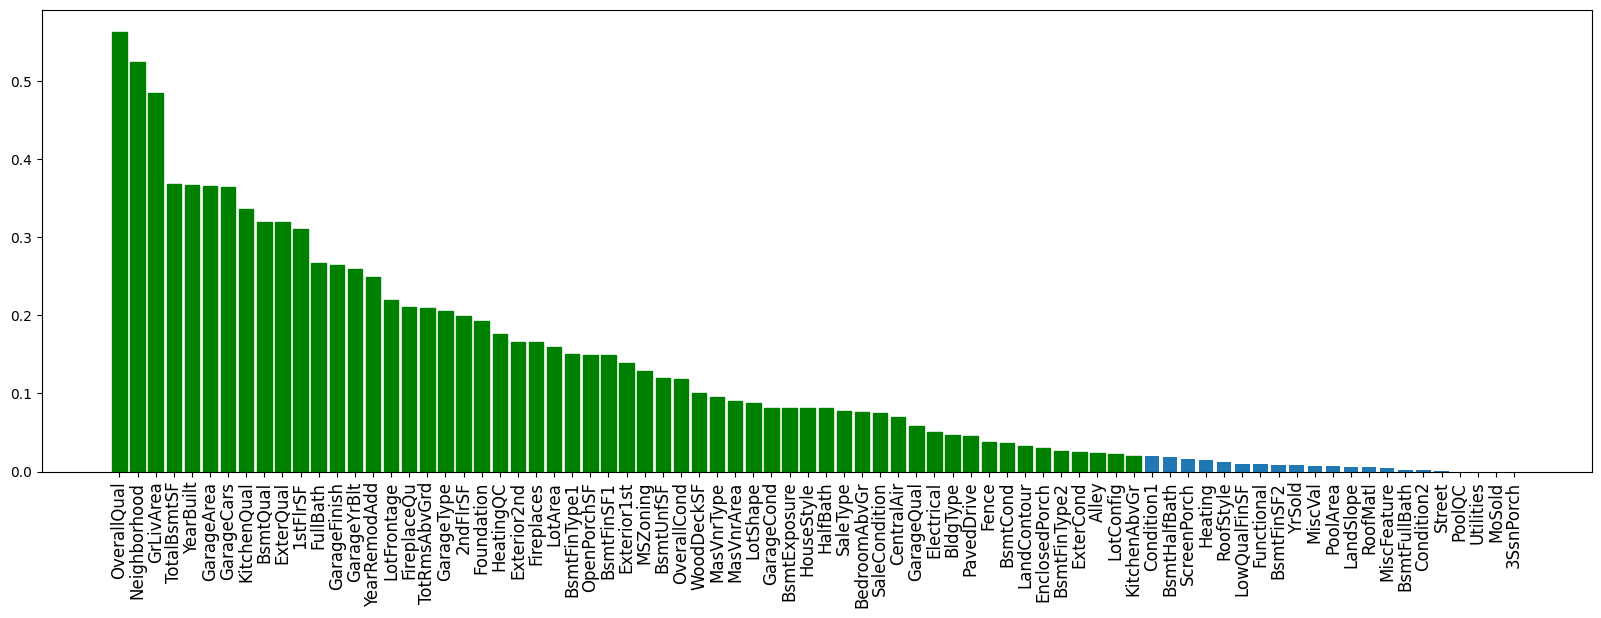

In [12]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    """
    Calculate Mutual Information (MI) scores for the features in the dataset.

    Parameters:
        X (pandas.DataFrame): The feature matrix.
        y (pandas.Series): The target variable.

    Returns:
        pandas.Series: A Series containing MI scores for each feature.
    """
    X = X.copy()
    categorical_feats = X.select_dtypes(include=['object', 'string'])

    for colname in categorical_feats:
        X[colname], _ = X[colname].factorize()

    discrete_features = [col in categorical_feats for col in X.columns]
    mi_scores_series = pd.Series(mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0),
                                 name="MI_scores", index=X.columns
                        )
    mi_scores_series.sort_values(ascending=False, inplace=True)

    return mi_scores_series


def plot_mi_scores(mi_scores, threshold):
    """
    Plot MI scores for the features, with bars exceeding the threshold shown in green.

    Parameters:
        mi_scores (pandas.Series): A Series containing MI scores for each feature.
        threshold (float): Threshold value for showing bars in green.
    """
    plt.figure(figsize=(20, 6))
    bars = plt.bar(mi_scores.index, mi_scores.values)

    for _, bar in enumerate(bars):
        if bar.get_height() > threshold:
            bar.set_color('green') 

    plt.xticks(rotation='vertical',fontsize=12)
    plt.show()


X = df.drop(columns='SalePrice')
y = df['SalePrice']
threshold = 0.02

mi_scores_series = make_mi_scores(X, y)
plot_mi_scores(mi_scores_series, threshold)
features_with_low_mi_score = mi_scores_series[mi_scores_series <= threshold].index

The following features will be dropped:

In [13]:
print(features_with_low_mi_score)
df_cleaned = df.drop(columns=features_with_low_mi_score, inplace=False)

Index(['Condition1', 'BsmtHalfBath', 'ScreenPorch', 'Heating', 'RoofStyle',
       'LowQualFinSF', 'Functional', 'BsmtFinSF2', 'YrSold', 'MiscVal',
       'PoolArea', 'LandSlope', 'RoofMatl', 'MiscFeature', 'BsmtFullBath',
       'Condition2', 'Street', 'PoolQC', 'Utilities', 'MoSold', '3SsnPorch'],
      dtype='object')


In [14]:
sum(df.PoolArea > 0)

7

It seems a bad idea to omit features such as PoolArea and PoolQc,butonly 7 observations actually has pool. Therefore, it would be a prudent decision to exclude these features.

Because I have a lot of features to explore, I organised them into categories. The categories are the following: 

- Location and Property Information: features related to the location, size, shape, and configuration of the property.
- Dwelling and Construction: features related to the type, style, quality, and construction details of the dwelling.
- Exterior and Foundation: features related to the exterior materials, quality, and condition, as well as the type of foundation.
- Basement and Heating: features related to the basement, its condition, and the heating system of the property.
- Interior and Living Space: features related to the interior amenities, living space, and utilities within the property.
- Garage and Driveway: features related to the garage, its quality, size, and condition, as well as the presence of a paved driveway.
- Miscellaneous and Sale Information: includes miscellaneous features and information related to the sale of the property.

For the sake of simplicity, I create a summary df, that has the categorizations of the features

In [15]:
feature_summary = pd.DataFrame(df_cleaned.columns, columns=['FeatureName'])

feature_summary['FeatureType'] = np.nan
feature_summary['FeatureCategory'] = np.nan

feature_summary['FeatureType'].loc[feature_summary['FeatureName'].isin(
    df_cleaned.select_dtypes(include=['object','string']))] = 'categorical'

feature_summary['FeatureType'].loc[feature_summary['FeatureName'].isin(
    df_cleaned.select_dtypes(include=['int64','float']))] = 'numerical'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'MSZoning', 'LotFrontage', 'LotArea','Condition1',
    'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood'
])] = 'Location and Property Information'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
    'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'MasVnrArea',
])] = 'Dwelling and Construction'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'ExterQual', 'ExterCond', 'Foundation'
])] = 'Exterior and Foundation'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF',
    'Heating', 'HeatingQC','BsmtFullBath','BsmtHalfBath'
])] = 'Basement and Heating'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF','LowQualFinSF',
    'GrLivArea', 'FullBath','HalfBath', 'KitchenQual','KitchenAbvGr',
    'TotRmsAbvGrd','BedroomAbvGr','GrLivArea',
])] = 'Interior and Living Space'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
    'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive'
])] = 'Garage and Driveway'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
    'Fence'
])] = 'Outdoor Features'

feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'FireplaceQu', 'Fireplaces'
])] = 'Fireplace'


feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([
    'MiscVal', 'SaleType', 'SaleCondition'
])] = 'Miscellaneous and Sale Information'

feature_summary['FeatureCategory'].unique()
feature_summary

/tmp/ipykernel_1873/4018042517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_summary['FeatureType'].loc[feature_summary['FeatureName'].isin(
/tmp/ipykernel_1873/4018042517.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_summary['FeatureCategory'].loc[feature_summary['FeatureName'].isin([


,FeatureName,FeatureType,FeatureCategory
0,MSZoning,categorical,Location and Property Information
1,LotFrontage,numerical,Location and Property Information
2,LotArea,numerical,Location and Property Information
3,Alley,categorical,Location and Property Information
4,LotShape,categorical,Location and Property Information
5,LandContour,categorical,Location and Property Information
6,LotConfig,categorical,Location and Property Information
7,Neighborhood,categorical,Location and Property Information
8,BldgType,categorical,Dwelling and Construction
9,HouseStyle,categorical,Dwelling and Construction


Let's have a look at our target variable: SalePrice

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64
Skewness: 1.88
Kurtosis: 6.54


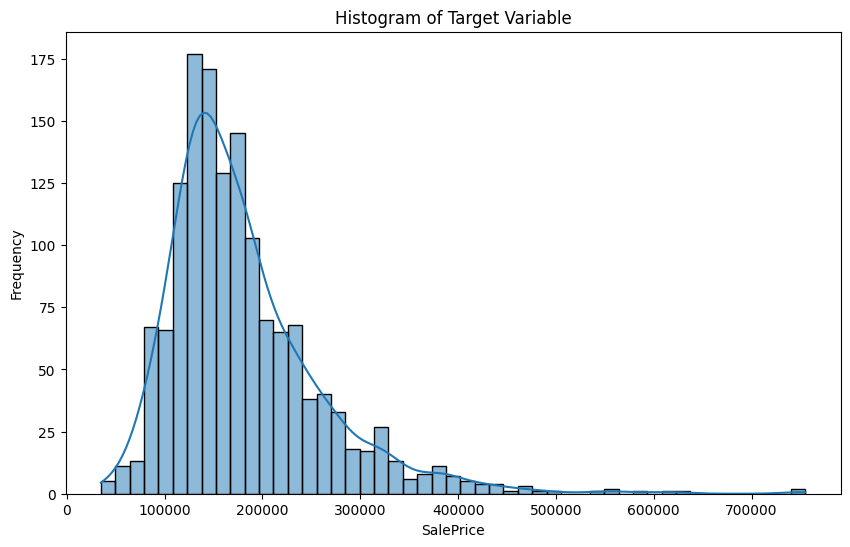

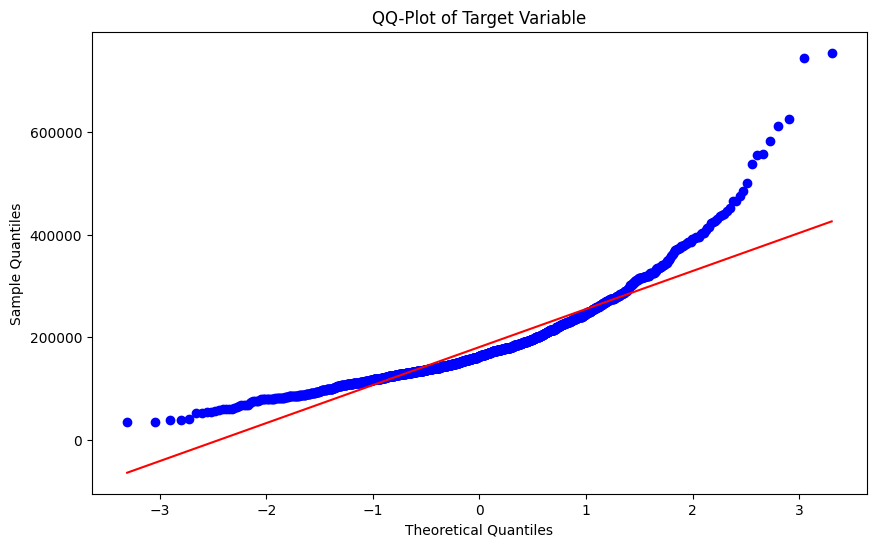

In [17]:
def examine_target_var(series):
    """
    Perform an examination of the target variable, including its skewness, kurtosis,
    histogram, and QQ-plot.

    Parameters:
        series (pandas.Series): The target variable.

    Returns:
        None
    """
    print(series.describe())
    print(f'Skewness: {series.skew():.2f}')
    print(f'Kurtosis: {series.kurtosis():.2f}')
    

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(series, kde=True)
    plt.title('Histogram of Target Variable')
    plt.xlabel('SalePrice')
    plt.ylabel('Frequency')
    plt.show()

    # Plot the QQ-plot
    plt.figure(figsize=(10, 6))
    (mu, sigma) = norm.fit(series)
    res = stats.probplot(series, plot=plt)
    plt.title('QQ-Plot of Target Variable')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()


examine_target_var(df_cleaned.SalePrice)


Our target variable does not follow normal distribution. It shows positive skewness, which indicates that the tail of the distribution extends to the right. Additionally, the high kurtosis suggests a higher peak compared to a normal distribution.

When using linear models, it is beneficial to transform the distribution of our target variable to achieve normality, as linear models assume a normally distributed target variable for optimal performance.

Skewness: 0.12
Kurtosis: 0.81


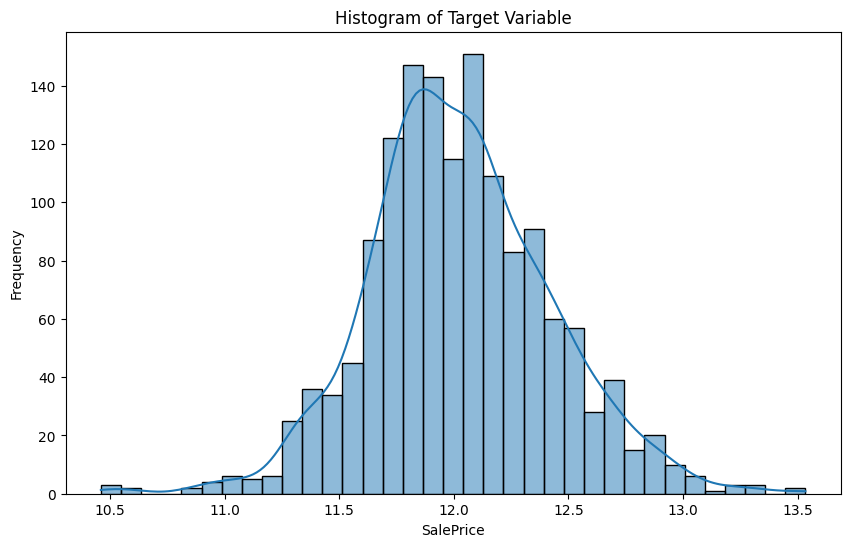

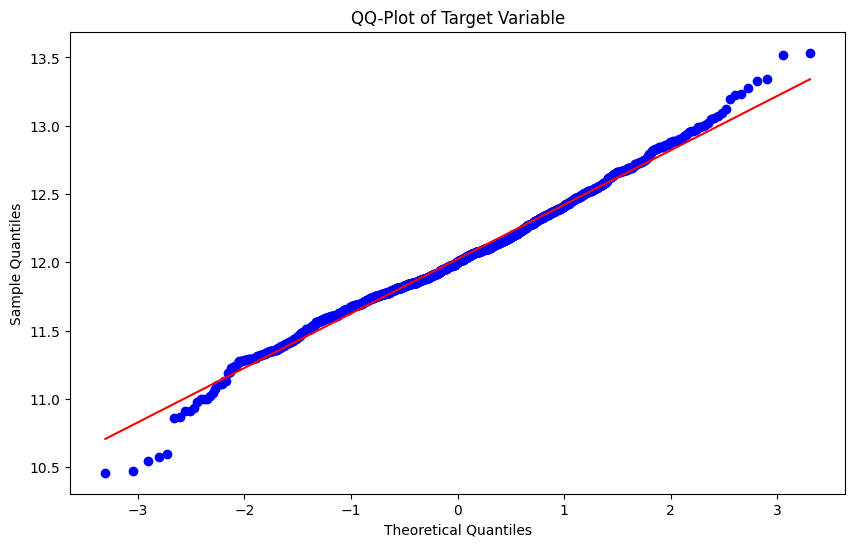

In [17]:
# Applying the natural logarithm transformation to the 'SalePrice' column.
df_cleaned["SalePrice_log"] = np.log1p(df_cleaned.SalePrice)

examine_target_var(df_cleaned["SalePrice_log"])

Creating methods to explore visually the features

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_features(df, feature_summary, category, target_var='SalePrice', size=6):
    """
    Plot pairwise scatter plots for the numeric features of a specific category 
    against the target variable.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature_summary (pd.DataFrame): A summary dataframe containing feature categories.
        category (str): The category of features to be plotted.
        target_var (str, optional): The name of the target variable. Default is 'SalePrice'.
        size (int, optional): Size of the plot. Default is 6.

    """
    features = feature_summary.loc[
        (feature_summary['FeatureCategory'] == category) &
        (feature_summary['FeatureType'] == 'numerical'),
        'FeatureName'
    ].tolist()
    
    if len(features) > 0:
        sns.pairplot(
            df[features + [target_var]], 
            height=size,
        )
        plt.xticks(rotation=90)
        plt.show()


def corr_matrix(df, feature_summary, category, target_var='SalePrice', figheight=6, figwidth=6):
    """
    Plot the correlation heatmap for the numeric features of a specific category
    against the target variable.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature_summary (pd.DataFrame): A summary dataframe containing feature categories.
        category (str): The category of features to be plotted.
        target_var (str, optional): The name of the target variable. Default is 'SalePrice'.
        figheight (int, optional): Height of the figure. Default is 6.
        figwidth (int, optional): Width of the figure. Default is 6.

    """
    num_features = feature_summary.loc[
        (feature_summary['FeatureCategory'] == category) &
        (feature_summary['FeatureType'] == 'numerical'),
        'FeatureName'
    ].tolist()

    if len(num_features) > 0:
        df = df[num_features + [target_var]]

        # Create a mask for the diagonal elements
        mask = np.zeros_like(df.corr())
        mask[np.triu_indices_from(mask)] = True

        # Set the colormap and figure size
        colormap = plt.cm.RdBu_r
        plt.figure(figsize=(figwidth, figheight))

        # Set the title and font properties
        plt.title("Correlation Heatmap")
        plt.xticks(rotation=90)

        # Plot the heatmap with the masked diagonal elements
        sns.heatmap(
            df.corr(), mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0,
            square=True, cmap=colormap, linecolor='white',
            annot=True, annot_kws={"size": 10, "weight": "bold"}
        )
        plt.show()


def plot_cat_feature(df, feature_summary, category, target_var='SalePrice', figheight=10, figwidth=10):
    """
    Plot box plots and count plots for categorical features of a specific category 
    against the target variable.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature_summary (pd.DataFrame): A summary dataframe containing feature categories.
        category (str): The category of features to be plotted.
        target_var (str, optional): The name of the target variable. Default is 'SalePrice'.
        figheight (int, optional): Height of the figure. Default is 10.
        figwidth (int, optional): Width of the figure. Default is 10.

    """
    cat_features = feature_summary.loc[
        (feature_summary['FeatureCategory'] == category) &
        (feature_summary['FeatureType'] == 'categorical'),
        'FeatureName'
    ].tolist()

    df = df[cat_features + [target_var]]

    num_plots = len(cat_features)
    fig, axes = plt.subplots(num_plots, 2, figsize=(figwidth, figheight))

    for i, feat in enumerate(cat_features):
        sns.boxplot(data=df, x=feat, y=target_var, ax=axes[i, 0])

        # Right subplot: Countplot
        sns.countplot(data=df, x=feat, ax=axes[i, 1])

        total = len(df[feat])  # Calculate the total count

        # Calculate the maximum height of the bars
        max_height = max([p.get_height() for p in axes[i, 1].patches])

        for p in axes[i, 1].patches:
            percentage = '{:.{prec}f}%'.format(100 * p.get_height() / total, prec=0)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()

            # Adjust the vertical position of the annotation
            if y > max_height * 0.8:
                va = 'top'
                offset = max_height * -0.02
            else:
                va = 'bottom'
                offset = 0

            axes[i, 1].annotate(percentage, (x, y), ha='center', va=va, xytext=(0, offset), textcoords='offset points')

        axes[i, 1].set_xlabel('')
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xticklabels(axes[i, 1].get_xticklabels(), rotation=90)
        axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=90)
        axes[i, 1].set_title(feat, pad=20, loc="center", size=10)
        axes[i, 0].set_title(feat, pad=20, loc="center", size=10)

    fig.tight_layout()
    plt.show()



Visualising the input features

Location and Property Information

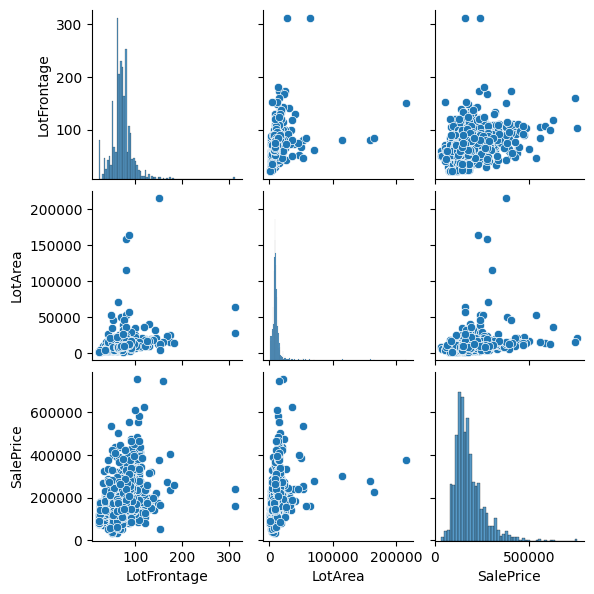

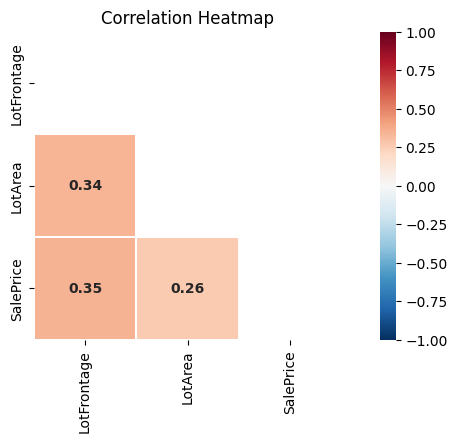

In [19]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Location and Property Information',
    size=2)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Location and Property Information',
    figheight=4, 
    figwidth=10
)

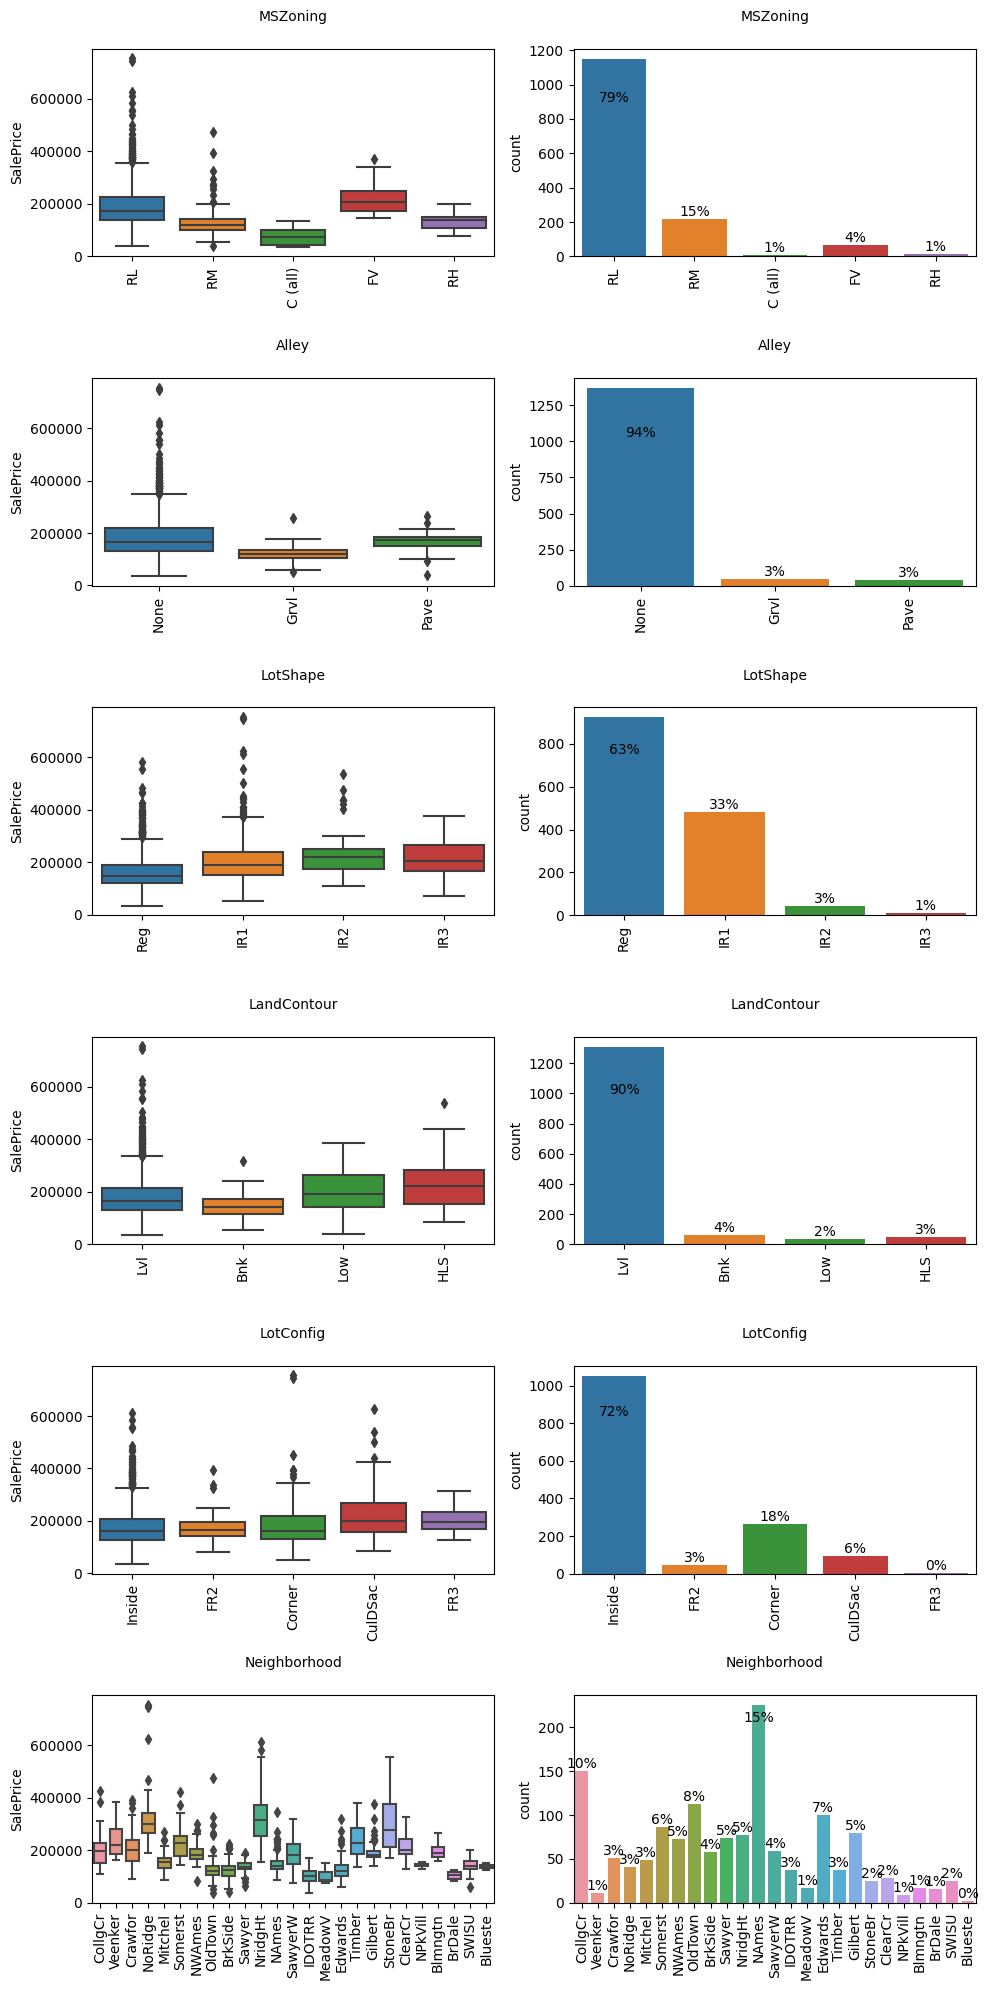

In [20]:
plot_cat_feature(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Location and Property Information', 
    figheight=20, 
    figwidth=10
)


Dwelling and Construction

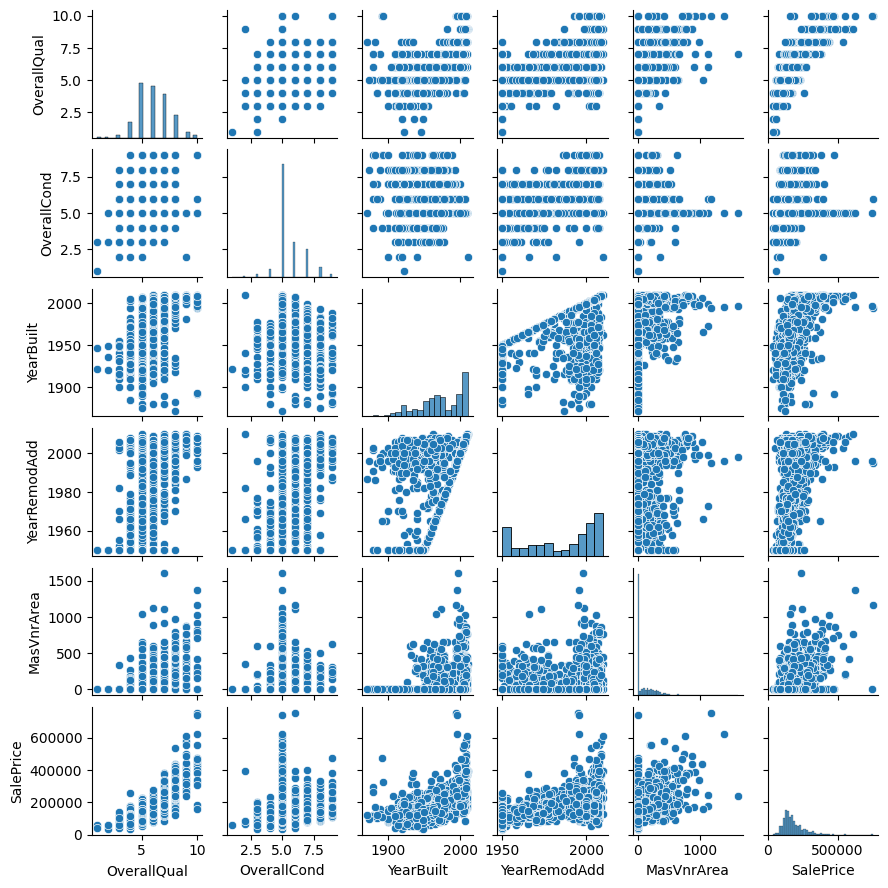

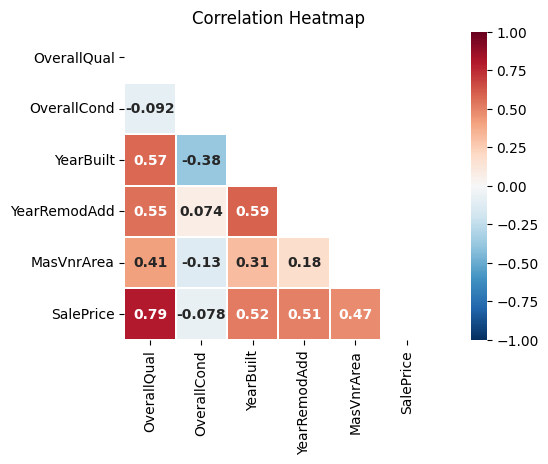

In [21]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Dwelling and Construction',
    size=1.5)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Dwelling and Construction',
    figheight=4, 
    figwidth=10
)

The OverallQuality seems a good predictor with a strong relationship with the SalePrice, but surprisingly, the OverallCondition has a low negative correlation, which goes against what I expected. Let's have a look at that feature

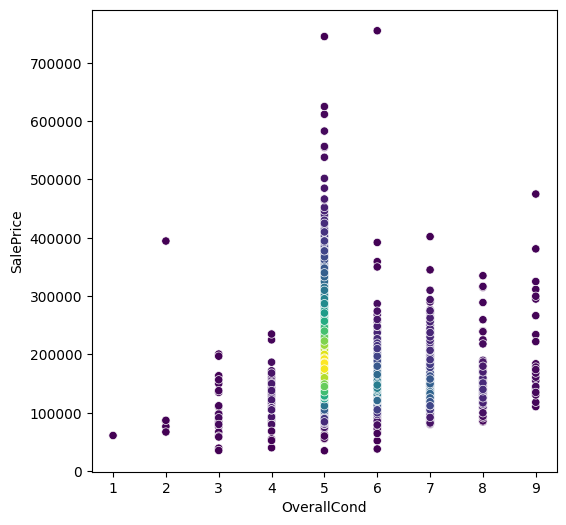

In [22]:
def scatterplot_with_density(x,y):
    values = np.vstack([df_cleaned["OverallCond"], df_cleaned["SalePrice_log"]])
    kernel = stats.gaussian_kde(values)(values)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(
        data=df_cleaned,
        x="OverallCond",
        y="SalePrice",
        c=kernel,
        cmap="viridis",
        ax=ax,
    ) 
    plt.show()

scatterplot_with_density(df_cleaned["OverallCond"], df_cleaned["SalePrice"])

<Axes: >

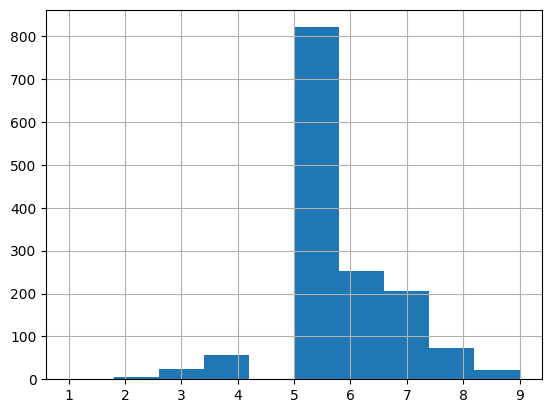

In [23]:
df_cleaned["OverallCond"].hist()

It appears that the majority of observations have an OverallCondition rating of 5. Considering this, it might be worth removing this feature, as it could potentially distort our model.

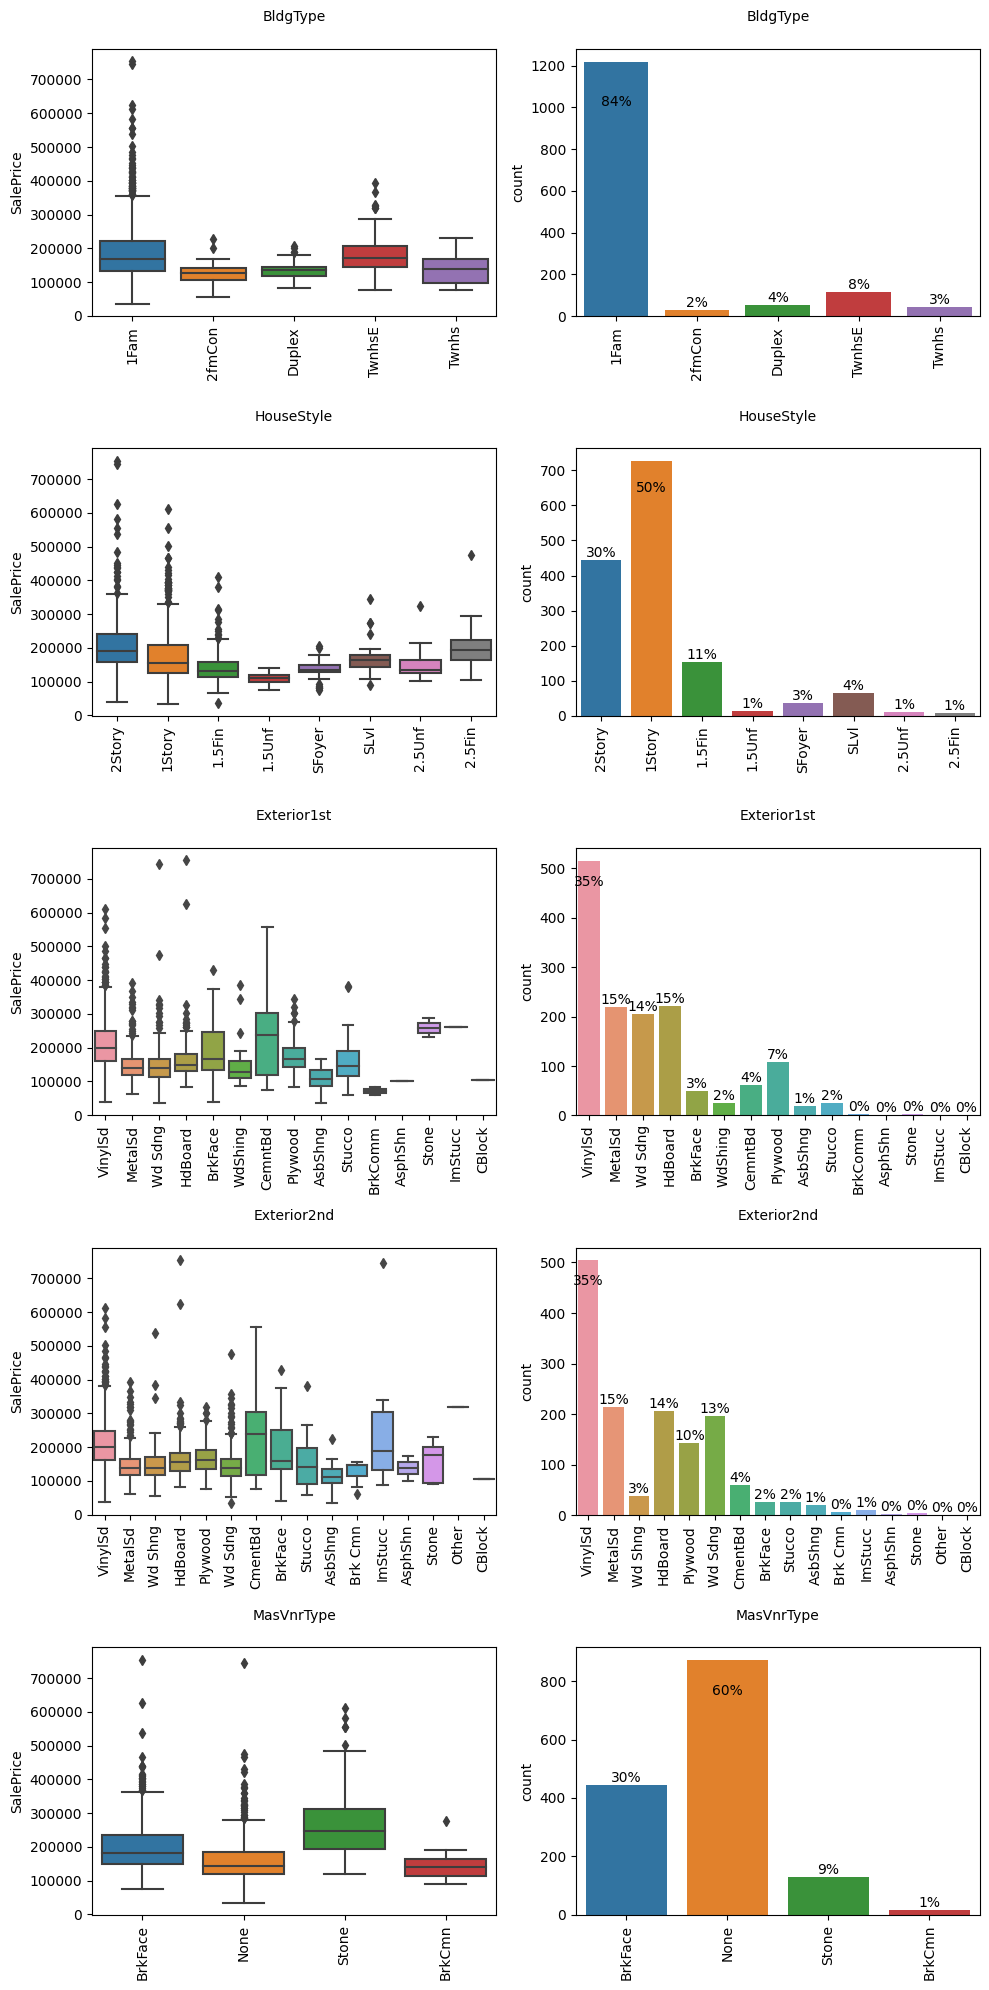

In [24]:
plot_cat_feature(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Dwelling and Construction', 
    figheight=20, 
    figwidth=10
)


Exterior and Foundation

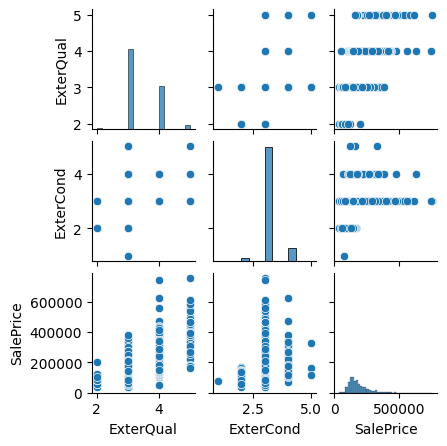

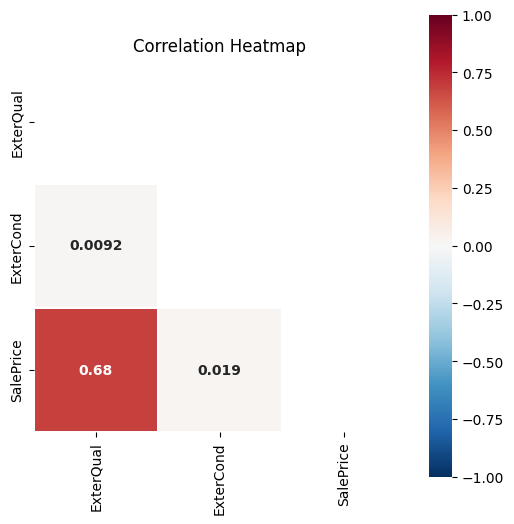

In [25]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Exterior and Foundation',
    size=1.5)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Exterior and Foundation'
)

In [26]:
df_cleaned['ExterCond'].value_counts()

ExterCond
3    1282
4     146
2      28
5       3
1       1
Name: count, dtype: int64

I can drop the ExterCond feature since most of the values are 3.

Basement and Heating

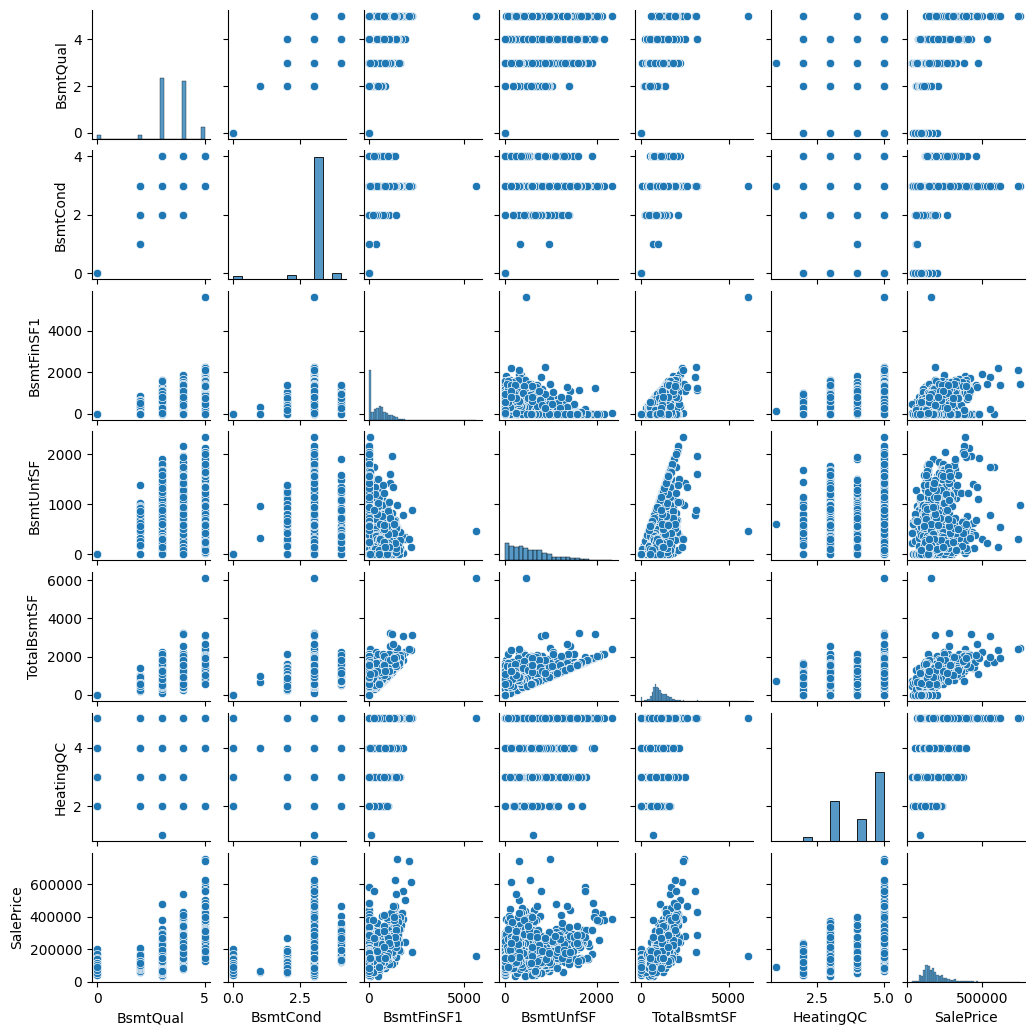

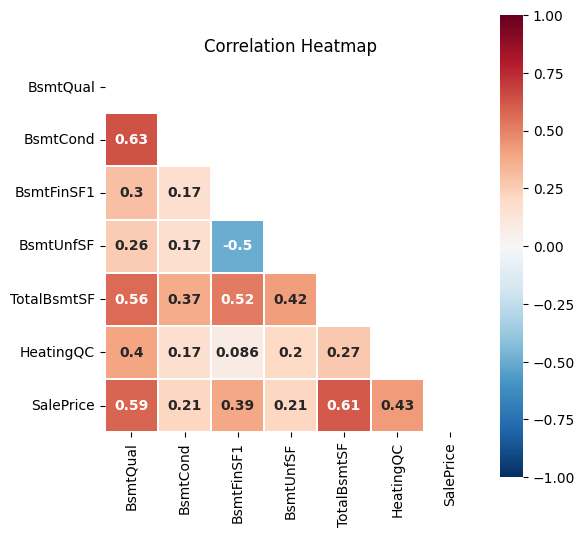

In [27]:
plot_numeric_features(
    df=df_cleaned,
    feature_summary=feature_summary,
    category='Basement and Heating',
    size=1.5)

corr_matrix(
    df=df_cleaned,
    feature_summary=feature_summary,
    category='Basement and Heating'
)

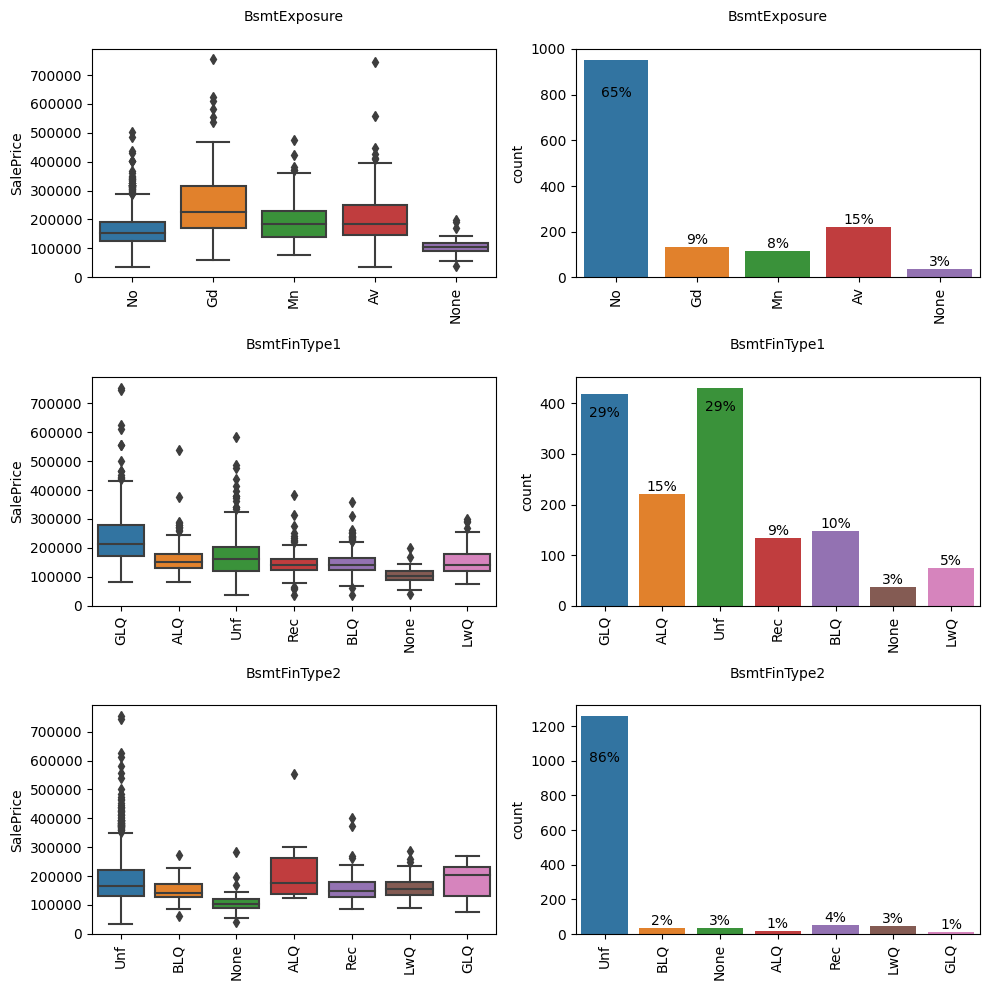

In [28]:
plot_cat_feature(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Basement and Heating', 
    figheight=10, 
    figwidth=10
)


Interior and Living Space

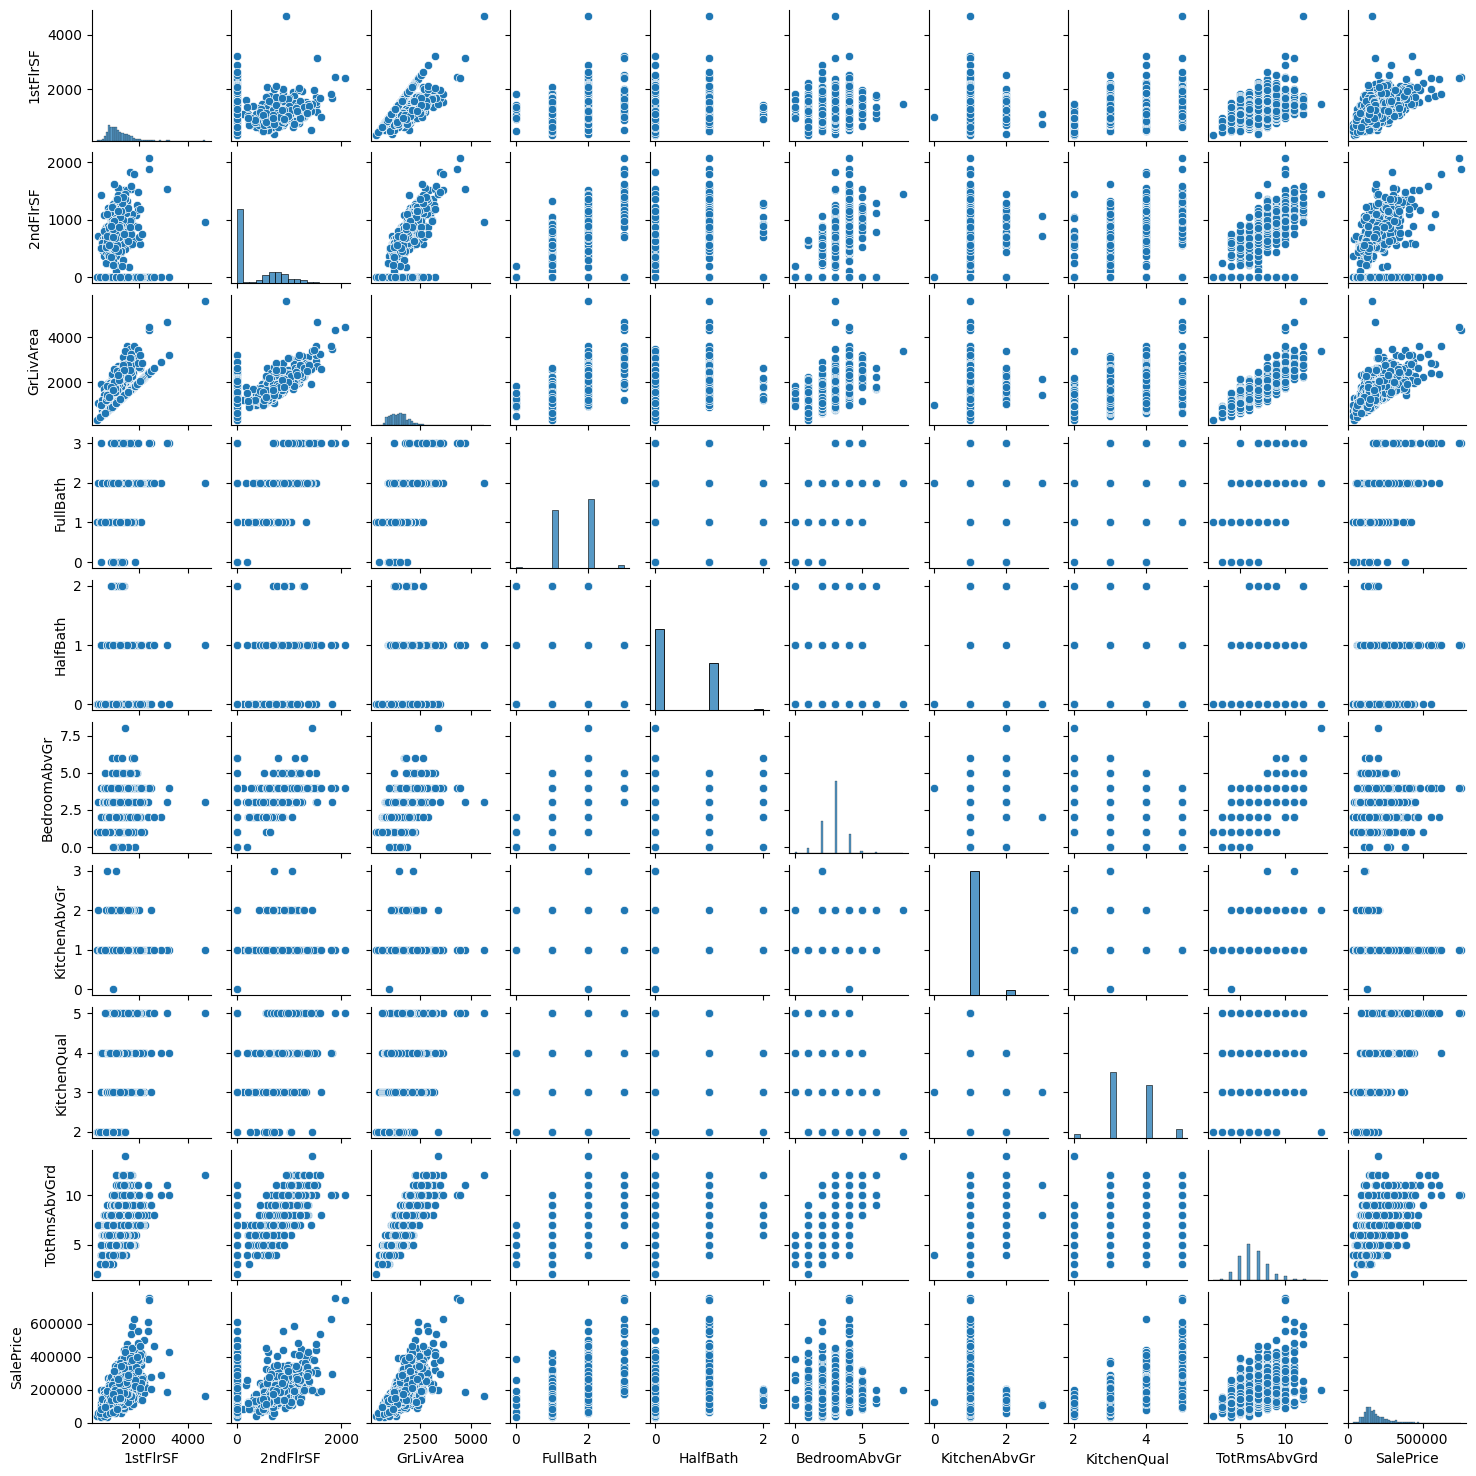

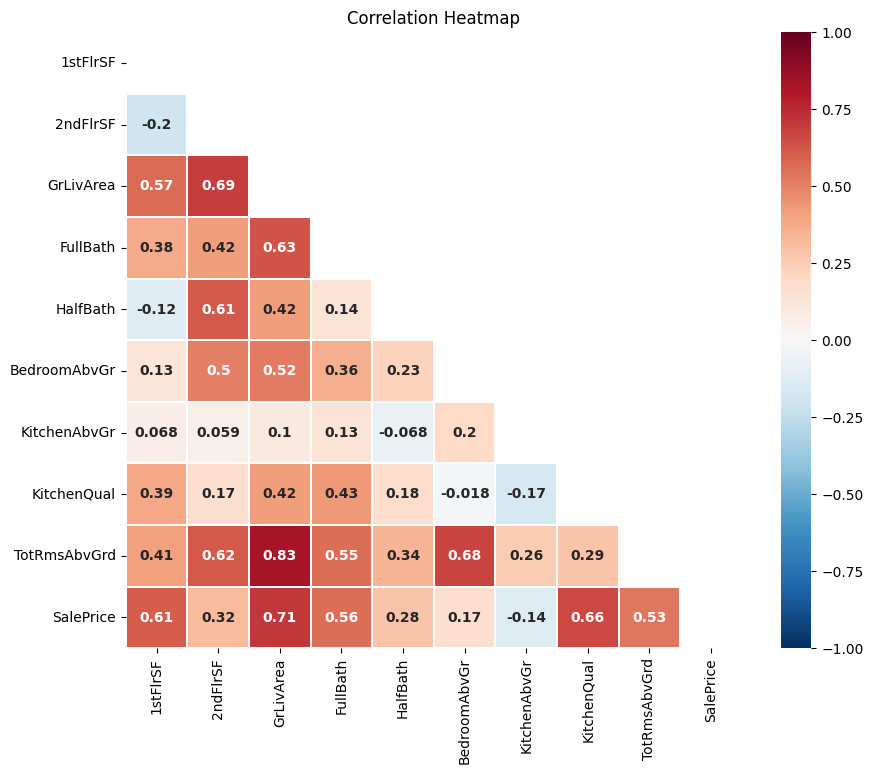

In [29]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Interior and Living Space',
    size=1.5)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Interior and Living Space',
    figheight=8, 
    figwidth=10
)

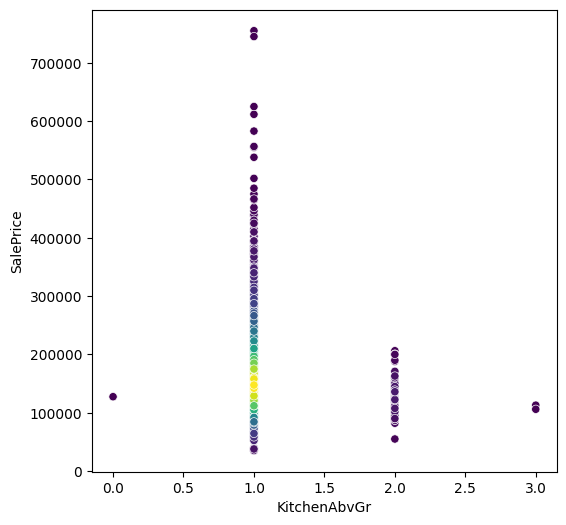

<Axes: >

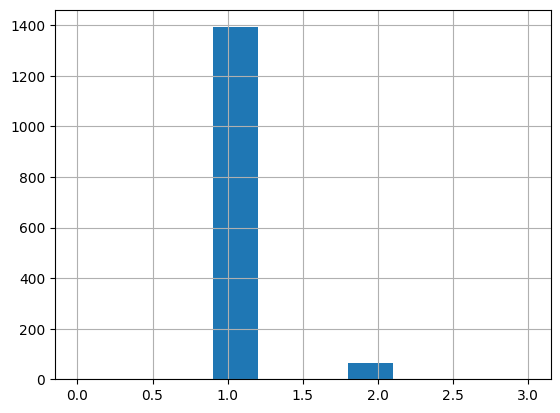

In [30]:
def scatterplot_with_density(x,y):
    values = np.vstack([df_cleaned["KitchenAbvGr"], df_cleaned["SalePrice"]])
    kernel = stats.gaussian_kde(values)(values)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(
        data=df_cleaned,
        x="KitchenAbvGr",
        y="SalePrice",
        c=kernel,
        cmap="viridis",
        ax=ax,
    ) 
    plt.show()

scatterplot_with_density(df_cleaned["KitchenAbvGr"], df_cleaned["SalePrice"])
df_cleaned["KitchenAbvGr"].hist()

The KitchenAbvGr means the total number of kitchens. Most of the cases its only 1. So we definitely should drop this feature

In [31]:
df_test = df_cleaned[['SalePrice','FullBath','HalfBath']].copy()

df_test['NumberBath'] = df_test['FullBath'] + df_test['HalfBath'] * 0.5
df_test[['SalePrice','NumberBath']].corr()



,SalePrice,NumberBath
SalePrice,1.00,0.60
NumberBath,0.60,1.00


If we merge the FullBath and HalfBath variable, we can reach higher correlaton!

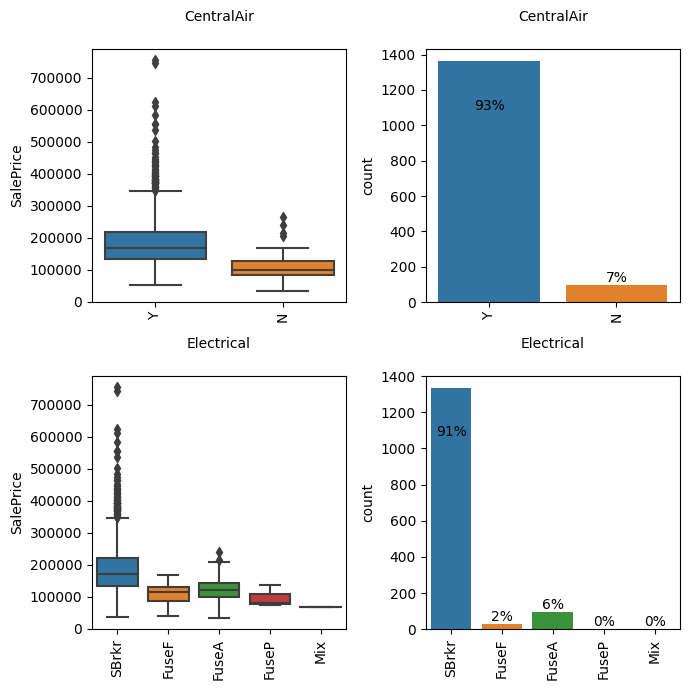

In [32]:
plot_cat_feature(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Interior and Living Space', 
    figheight=7, 
    figwidth=7
)


Fireplace

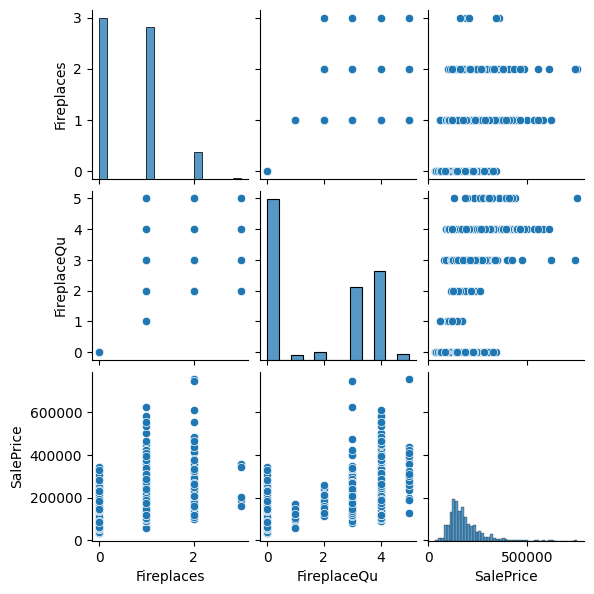

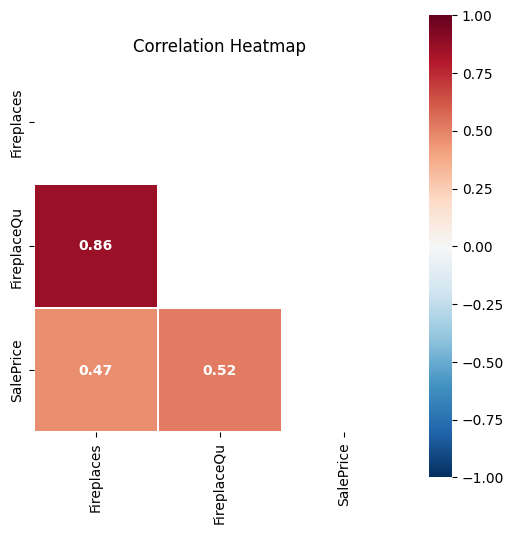

In [33]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Fireplace',
    size=2)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Fireplace',
)

Garage and Driveway

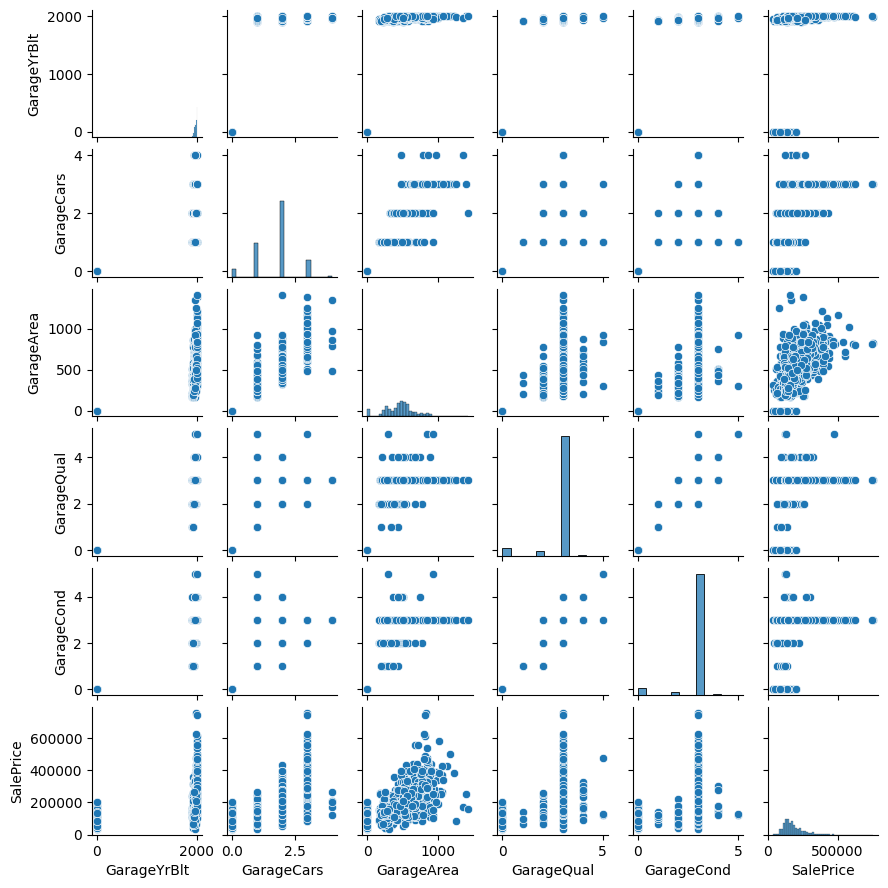

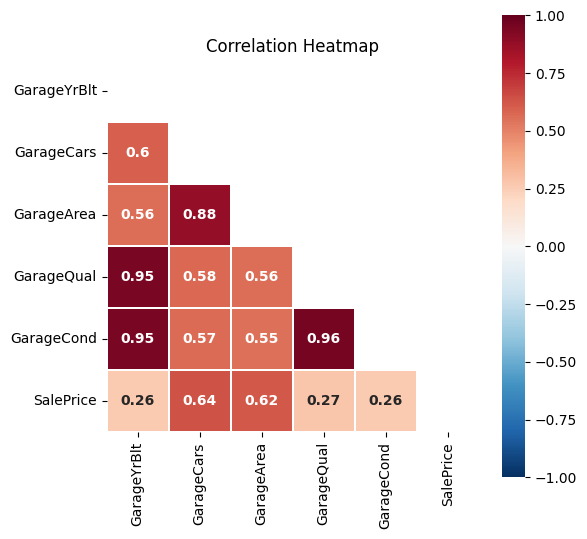

In [34]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Garage and Driveway',
    size=1.5)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Garage and Driveway'
)

The GarageCars and the GarageArea technically means almost the same. I will use GarageCars with the higher correlation and drop the GaragArea feature

The GarageQuality and the GarageCondition means the same in my interpretation. I will go with the one with the higer correlation (GarageQual) and drop the other one

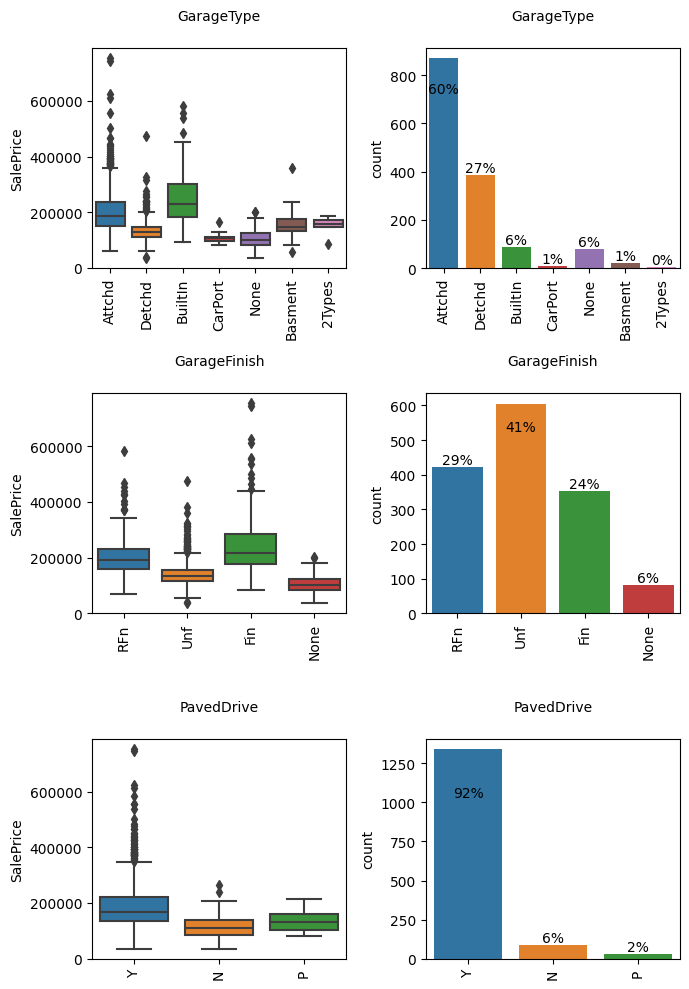

In [35]:
plot_cat_feature(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Garage and Driveway', 
    figheight=10, 
    figwidth=7
)


Outdoor Features

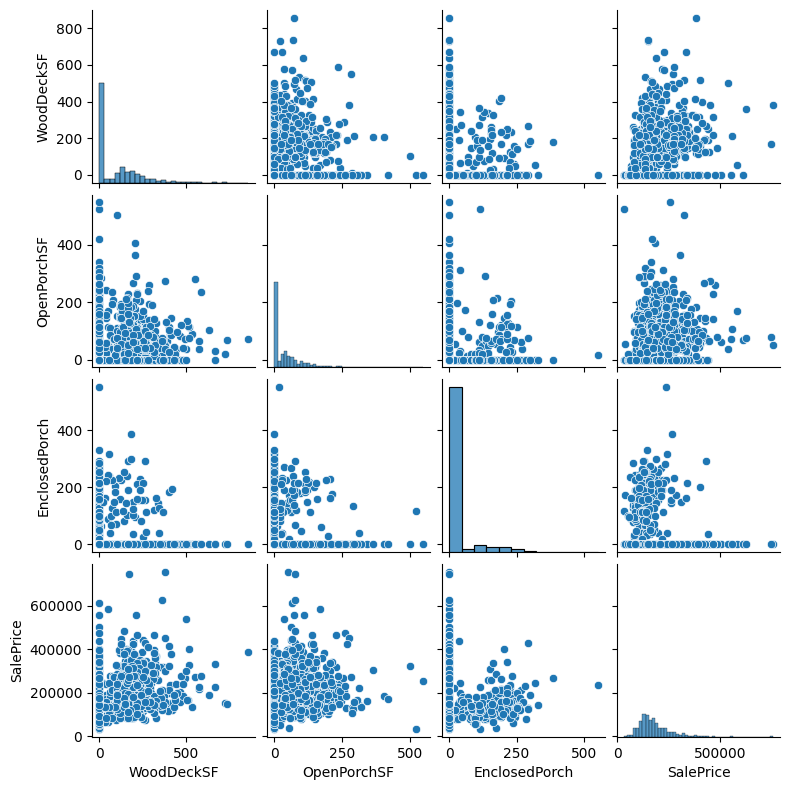

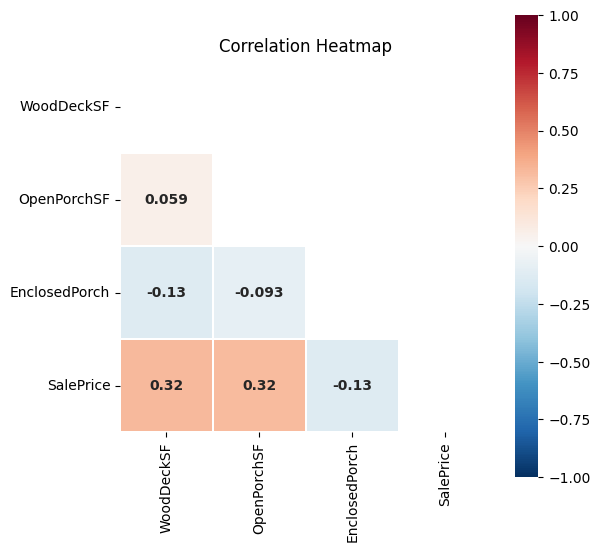

In [36]:
plot_numeric_features(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Outdoor Features',
    size=2)

corr_matrix(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Outdoor Features'
)

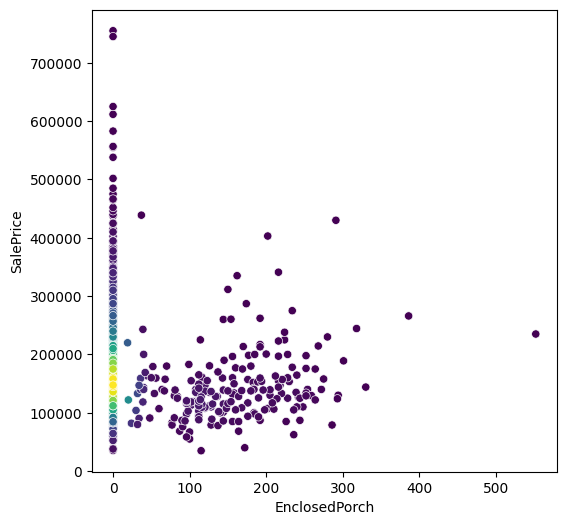

<Axes: >

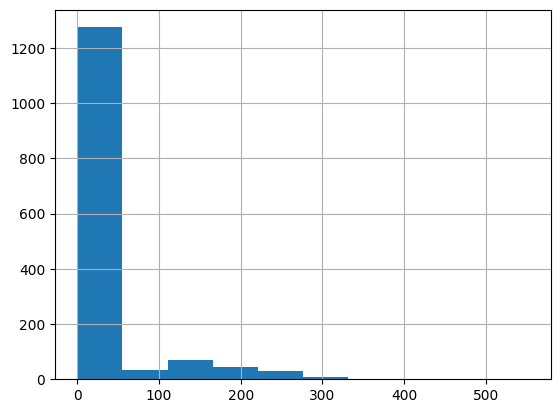

In [37]:
def scatterplot_with_density(x,y):
    values = np.vstack([df_cleaned["EnclosedPorch"], df_cleaned["SalePrice"]])
    kernel = stats.gaussian_kde(values)(values)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(
        data=df_cleaned,
        x="EnclosedPorch",
        y="SalePrice",
        c=kernel,
        cmap="viridis",
        ax=ax,
    ) 
    plt.show()

scatterplot_with_density(df_cleaned["EnclosedPorch"], df_cleaned["SalePrice"])
df_cleaned["EnclosedPorch"].hist()

Miscellaneous and Sale Information

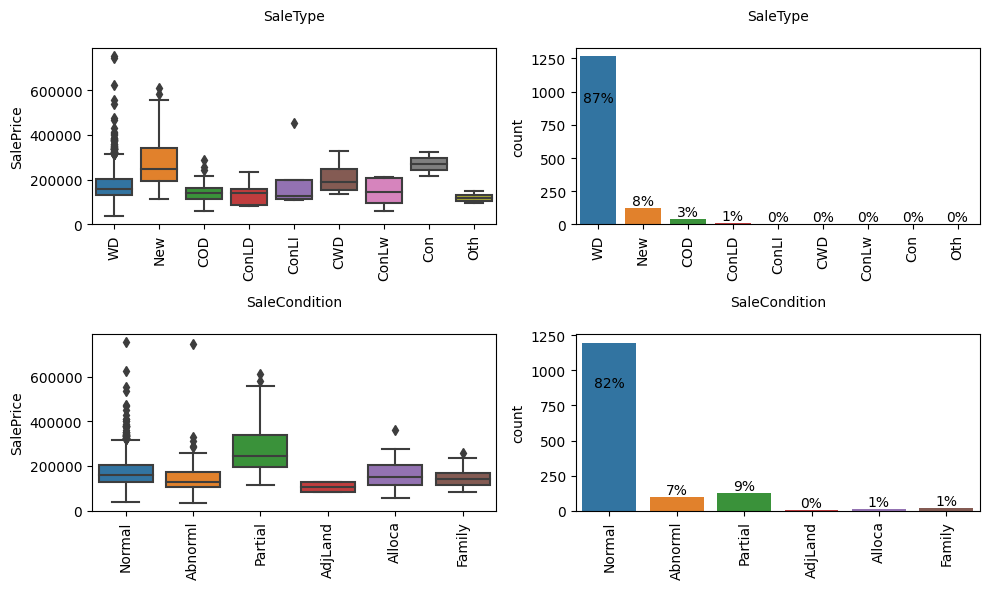

In [38]:
plot_cat_feature(
    df=df_cleaned, 
    feature_summary=feature_summary,
    category='Miscellaneous and Sale Information', 
    figheight=6, 
    figwidth=10
)


Executing the transformation based on the previously mentioned observations

In [39]:
# Dropping the OverallCond feature
df_cleaned.drop(columns='OverallCond', inplace=True)

# Dropping the ExterCond feature
df_cleaned.drop(columns='ExterCond', inplace=True)

# Dropping the KitchenAbvAg feature
df_cleaned.drop(columns='KitchenAbvGr', inplace=True) 

# Dropping GarageArea
df_cleaned.drop(columns='GarageArea', inplace=True) 

# Dropping GaragCond
df_cleaned.drop(columns='GarageCond', inplace=True) 

# Drop EnclosedPorch
df_cleaned.drop(columns='EnclosedPorch', inplace=True) 

# Merge fullbath and halfbath and drop the original ones
df_cleaned['NumberBath'] = df_cleaned['FullBath'] + df_cleaned['HalfBath'] * 0.5
df_cleaned.drop(columns=['FullBath','HalfBath'], inplace=True)

In [41]:
# Write the final form of the data into a CSV file
df_cleaned.to_csv(r'data-processed/data.csv', index=False)